# K-Nearest Neighbors

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In the below diagram case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

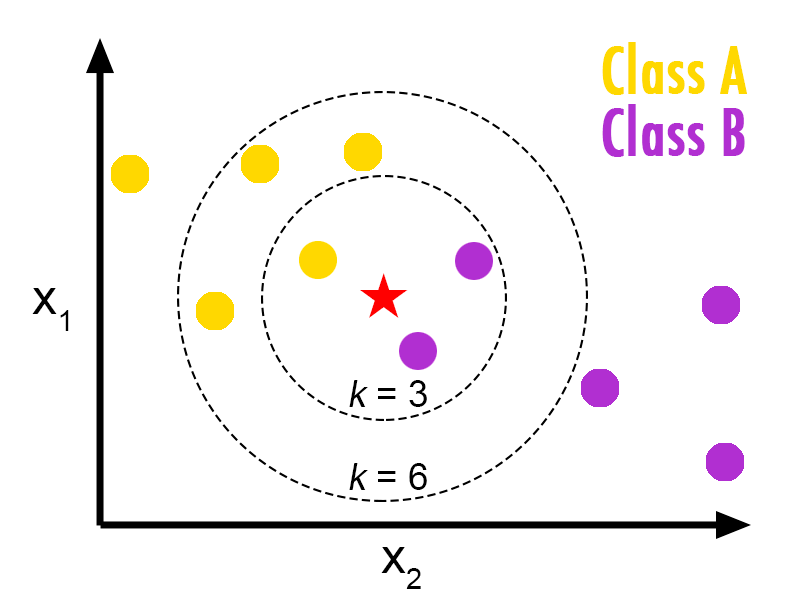

n this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

# Train/Test Split on the Skulls Dataset with K-Nearest Neighbors¶
Import Libraries
Import the Following Libraries:
numpy (as np)
pandas
KNeighborsClassifier from sklearn.neighbors

In [34]:
import numpy as np 
import pandas 
from sklearn.neighbors import KNeighborsClassifier

Using my_data as the skulls.csv data read by panda, declare variables X as the Feature Matrix (data of my_data) and y as the response vector (target)
Note: Use the target function for the response vector and the removeColumns function for the Feature Matrix

In [35]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")

In [36]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [37]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Also remove the column that contains the row number
# axis=1 means we are removing columns instead of rows.
# Function takes in a pandas array and column numbers and returns a numpy array without
# the stated columns
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [38]:
X = removeColumns(my_data,0,1)
y = target(my_data,1)

Now to perform train/test split we have to split the X and y into two different sets: The training and testing set. Luckily there is a sklearn function for just that!
Import the train_test_split from sklearn.cross_validation

In [39]:
from sklearn.cross_validation import train_test_split

Now train_test_split will return 4 different parameters. We will name this X_trainset, X_testset, y_trainset, y_testset. The train_test_split will need the parameters X, y, test_size=0.3, and random_state=7. The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures we obtain the same splits.

In [40]:
X_trainset,X_testset,y_trainset,y_testset = train_test_split(X,y,test_size=0.3,random_state=7)

Now let's print the shape of the training sets to see if they match.

In [41]:
print(X_trainset.shape)
print(y_trainset.shape)

(105, 4)
(105,)


Let's check the same with the testing sets! They should both match up!

In [42]:
print (X_testset.shape)
print (y_testset.shape)

(45, 4)
(45,)


Now similarly with the last lab, let's create declarations of KNeighborsClassifier. Except we will create 3 different ones:
neigh -> n_neighbors = 1 
neigh23 -> n_neighbors = 23 
neigh90 -> n_neighbors = 90 

In [43]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh23 = KNeighborsClassifier(n_neighbors = 23)
neigh90 = KNeighborsClassifier(n_neighbors = 90)

Now we will fit each instance of KNeighborsClassifier with the X_trainset and y_trainset

In [44]:
neigh.fit(X_trainset,y_trainset)
neigh23.fit(X_trainset,y_trainset)
neigh90.fit(X_trainset,y_trainset)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

passing in the y_testset which contains multiple test points into a predict function of KNeighborsClassifier.
Lets pass the y_testset in the predict function each instance of KNeighborsClassifier but store it's returned value into pred, pred23, pred90 (corresponding to each of their names)

In [45]:
pred = neigh.predict(X_testset)
pred23 = neigh23.predict(X_testset)
pred90 = neigh90.predict(X_testset)

Now let's compute neigh's prediction accuracy. We can do this by using the metrics.accuracy_score function

In [46]:
from sklearn import metrics
print("Neigh's Accuracy: "), metrics.accuracy_score(y_testset, pred)

Neigh's Accuracy: 


(None, 0.22222222222222221)

Let's do the same for the other instances of KNeighborsClassifier.

In [47]:
print("Neigh23's Accuracy:"), metrics.accuracy_score(y_testset,pred23)
print("Neigh90's Accuracy:"), metrics.accuracy_score(y_testset,pred90)

Neigh23's Accuracy:
Neigh90's Accuracy:


(None, 0.13333333333333333)

As above, the accuracy of neigh23 is the highest. When n_neighbors = 1, the model was overfit to the training data (too specific) and when n_neighbors = 90, the model was underfit (too generalized). In comparison, n_neighbors = 23 had a good balance between Bias and Variance, creating a generalized model that neither underfit the data nor overfit it